In [ ]:
# Install the Roboflow package
!pip install roboflow

# Import Roboflow and download your dataset
from roboflow import Roboflow

# Initialize Roboflow with your API key
rf = Roboflow(api_key="KBALF6O7uSsO4ZWszj5o")  # Replace with your actual API key

# Access your project and dataset version
project = rf.workspace("pani-edukal").project("ambulance-zpivn")
dataset = project.version(2).download("yolov8")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.9/86.9 kB 753.8 kB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 22.8 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 35.5 MB/s eta 0:00:0000:01m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 24.9 MB/s eta 0:00:0000:0100:01m
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.11.0.86
    Uninstalling opencv-python-headless-4.11.0.86:
      Successfully uninstalled opencv-python-headless-4.11.0.86
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
bigframes 2.8.0 requires goog


Extracting Dataset Version Zip to ambulance-2 in yolov8:: 100%|██████████| 3277/3277 [00:00<00:00, 7768.36it/s]


In [ ]:
# Install Ultralytics for YOLOv8
!pip install ultralytics

# Install OpenCV for image processing (optional but useful)
!pip install opencv-python-headless

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 3.4 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.4 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 34.8 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 39.5 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 46.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.6 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 2.8 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 20.3 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 11.0 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 7.3 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 33.4 MB/s eta 0:00:0000:0100:01
  Attempting uninstall:

In [ ]:
# Step 3: Verify dataset directory structure
#!ls /kaggle/working/ambulance-zpivn-2/
#!ls /kaggle/working/ambulance-zpivn-2/train/images
#!ls /kaggle/working/ambulance-zpivn-2/valid/images

# Step 4: Create data.yaml with correct paths
import yaml

config = {
    'train': '/kaggle/working/ambulance-2/train/images',
    'val': '/kaggle/working/ambulance-2/test',
    'nc': 3,
    'names': ['P1', 'P2', 'P3']
}

# Save data.yaml in the correct directory
yaml_path = '/kaggle/working/ambulance-2/data.yaml'
with open(yaml_path, 'w') as f:
    yaml.dump(config, f, default_flow_style=False)

# Step 5: Verify data.yaml content
!cat /kaggle/working/ambulance-zpivn-2/data.yaml

cat: /kaggle/working/ambulance-zpivn-2/data.yaml: No such file or directory


In [ ]:
from ultralytics import YOLO
import yaml
import json
import os

# Load the model
model = YOLO('yolov8m.pt')

# Optimized training with class imbalance handling
print("Starting training with class imbalance optimization...")

results = model.train(
    data=yaml_path,            # Use the created yaml path
    epochs=100,                # More epochs with early stopping
    imgsz=832,                 # Higher resolution (divisible by 32)
    batch=16,                  # Adjust based on Kaggle GPU memory
    lr0=0.001,                 # Initial learning rate
    lrf=0.01,                  # Final learning rate ratio
    momentum=0.937,            # Momentum for SGD
    weight_decay=0.0005,       # L2 regularization
    cos_lr=True,               # Cosine learning rate scheduler
    optimizer='AdamW',         # AdamW optimizer

    # Enhanced augmentations for class imbalance
    augment=True,
    degrees=25,                # Increased rotation for better minority class learning
    translate=0.3,             # Translation augmentation
    scale=0.8,                 # Scale augmentation
    shear=3.0,                 # Shear augmentation
    perspective=0.0002,        # Perspective transformation
    flipud=0.0,                # No vertical flip for ambulances
    fliplr=0.5,                # Horizontal flip
    mosaic=1.0,                # Mosaic augmentation
    mixup=0.15,                # Mixup augmentation (helps with class imbalance)
    copy_paste=0.2,            # Copy-paste augmentation (good for minority classes)

    # HSV augmentations
    hsv_h=0.02,                # Hue variation
    hsv_s=0.8,                 # Saturation
    hsv_v=0.5,                 # Value/brightness

    # Training settings
    patience=25,               # Early stopping patience
    save_period=10,            # Save checkpoint every 10 epochs
    val=True,                  # Validation during training
    plots=True,                # Generate training plots

    # Class imbalance handling - KEY CHANGES
    cls=1.5,                   # Higher classification loss weight (helps minority classes)
    box=7.5,                   # Box loss weight
    dfl=1.5,                   # DFL loss weight

    # Detection thresholds optimized for class imbalance
    iou=0.65,                  # Slightly lower IoU threshold
    conf=0.2,                  # Lower confidence threshold to catch minority classes

    # Other optimizations
    workers=2,                 # Lower workers for Kaggle (avoid memory issues)
    device=0,                  # Use GPU
    project='ambulance_detection',
    name='yolov8m_class_balanced',
    exist_ok=True,
    pretrained=True,
    verbose=True,

    # Multi-scale training
    rect=False,                # Disable rectangular training for better augmentation

    # Advanced settings for class imbalance
    label_smoothing=0.15,      # Higher label smoothing for better generalization
    nbs=64,                    # Nominal batch size
    dropout=0.0,               # No dropout for detection

    # Memory optimization for Kaggle
    amp=True,                  # Automatic Mixed Precision (saves memory)
    fraction=0.9,              # Use 90% of available GPU memory
)

print("Training completed!")
print(f"Best model saved at: {results.save_dir}/weights/best.pt")

# Save the final trained model
model.save(os.path.join(results.save_dir, 'final_model.pt'))
print(f"Final model saved at: {results.save_dir}/final_model.pt")

# Validate the final model
print("\nValidating final model...")
validation_results = model.val(
    data=yaml_path,
    save_json=True,
    plots=True,
    verbose=True
)

print("Validation results:")
print(f"mAP50: {validation_results.box.map50:.4f}")
print(f"mAP50-95: {validation_results.box.map:.4f}")

# Print per-class metrics
if hasattr(validation_results.box, 'maps'):
    class_names = ['P1', 'P2', 'P3']
    for i, (name, map_val) in enumerate(zip(class_names, validation_results.box.maps)):
        print(f"{name} mAP50: {map_val:.4f}")

# Save training configuration for reference
training_config = {
    'model': 'yolov8m.pt',
    'epochs': 100,
    'imgsz': 832,
    'batch': 16,
    'augmentation': 'enhanced_for_class_imbalance',
    'class_focus': 'minority_class_emphasis',
    'notes': 'Optimized for P1/P2 minority classes with stronger augmentation and higher classification loss weight'
}

with open('training_config.json', 'w') as f:
    json.dump(training_config, f, indent=2)

print("\nTraining configuration saved to training_config.json")

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


100%|██████████| 49.7M/49.7M [00:00<00:00, 58.0MB/s]


Starting training with class imbalance optimization...
WARNING ⚠️ 'label_smoothing' is deprecated and will be removed in in the future.
Ultralytics 8.3.167 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=True, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=1.5, conf=0.2, copy_paste=0.2, copy_paste_mode=flip, cos_lr=True, cutmix=0.0, data=/kaggle/working/ambulance-2/data.yaml, degrees=25, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=100, erasing=0.4, exist_ok=True, fliplr=0.5, flipud=0.0, format=torchscript, fraction=0.9, freeze=None, half=False, hsv_h=0.02, hsv_s=0.8, hsv_v=0.5, imgsz=832, int8=False, iou=0.65, keras=False, kobj=1.0, line_width=None, lr0=0.001, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.15, mode=train, model=yolov8m.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=y

100%|██████████| 755k/755k [00:00<00:00, 3.76MB/s]


Overriding model.yaml nc=80 with nc=3

                   from  n    params  module                                       arguments                     
  0                  -1  1      1392  ultralytics.nn.modules.conv.Conv             [3, 48, 3, 2]                 
  1                  -1  1     41664  ultralytics.nn.modules.conv.Conv             [48, 96, 3, 2]                
  2                  -1  2    111360  ultralytics.nn.modules.block.C2f             [96, 96, 2, True]             
  3                  -1  1    166272  ultralytics.nn.modules.conv.Conv             [96, 192, 3, 2]               
  4                  -1  4    813312  ultralytics.nn.modules.block.C2f             [192, 192, 4, True]           
  5                  -1  1    664320  ultralytics.nn.modules.conv.Conv             [192, 384, 3, 2]              
  6                  -1  4   3248640  ultralytics.nn.modules.block.C2f             [384, 384, 4, True]           
  7                  -1  1   1991808  ultralytics

100%|██████████| 5.35M/5.35M [00:00<00:00, 16.2MB/s]


AMP: checks passed ✅
train: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1298.4±350.2 MB/s, size: 46.4 KB)


train: Scanning /kaggle/working/ambulance-2/train/labels... 1290 images, 24 backgrounds, 0 corrupt: 100%|██████████| 1290/1290 [00:00<00:00, 1540.32it/s]

train: New cache created: /kaggle/working/ambulance-2/train/labels.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 818.3±474.5 MB/s, size: 69.7 KB)


val: Scanning /kaggle/working/ambulance-2/test/labels... 201 images, 5 backgrounds, 0 corrupt: 100%|██████████| 201/201 [00:00<00:00, 1970.44it/s]

val: New cache created: /kaggle/working/ambulance-2/test/labels.cache


Plotting labels to ambulance_detection/yolov8m_class_balanced/labels.jpg... 
optimizer: AdamW(lr=0.001, momentum=0.937) with parameter groups 77 weight(decay=0.0), 84 weight(decay=0.0005), 83 bias(decay=0.0)
Image sizes 832 train, 832 val
Using 2 dataloader workers
Logging results to ambulance_detection/yolov8m_class_balanced
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      10.3G      1.638      7.645      2.026         60        832: 100%|██████████| 81/81 [01:15<00:00,  1.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.44it/s]

                   all        201        371      0.209      0.382      0.172     0.0599



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      10.7G      1.572      6.564      2.013         37        832: 100%|██████████| 81/81 [01:14<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.73it/s]

                   all        201        371      0.249      0.345      0.244     0.0853



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      10.7G      1.592      6.666      2.025         48        832: 100%|██████████| 81/81 [01:14<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.73it/s]

                   all        201        371       0.27      0.436      0.257      0.103



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      10.7G      1.571      6.605      2.018         25        832: 100%|██████████| 81/81 [01:14<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.73it/s]

                   all        201        371      0.336      0.382      0.295      0.138



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100      10.7G      1.524      6.323      1.981         65        832: 100%|██████████| 81/81 [01:14<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.72it/s]

                   all        201        371      0.222       0.39      0.211      0.104



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100      10.6G      1.524      6.191      1.972         64        832: 100%|██████████| 81/81 [01:14<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.72it/s]

                   all        201        371       0.46      0.393        0.4      0.176



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100      10.7G      1.495      6.012      1.937         43        832: 100%|██████████| 81/81 [01:14<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.72it/s]

                   all        201        371      0.501      0.523       0.51      0.253



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      10.8G      1.462      5.796      1.904         47        832: 100%|██████████| 81/81 [01:14<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.73it/s]

                   all        201        371      0.391       0.57      0.482      0.272



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      10.7G      1.414      5.713       1.86         35        832: 100%|██████████| 81/81 [01:14<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.72it/s]

                   all        201        371       0.57       0.62      0.607      0.279



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100      10.7G      1.388       5.39      1.837         30        832: 100%|██████████| 81/81 [01:14<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.72it/s]

                   all        201        371      0.617      0.552      0.615      0.319



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      10.7G      1.383      5.416      1.832         58        832: 100%|██████████| 81/81 [01:14<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.72it/s]

                   all        201        371      0.577      0.525      0.597      0.278



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100      10.8G      1.352      5.199      1.787         42        832: 100%|██████████| 81/81 [01:14<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.72it/s]

                   all        201        371      0.602      0.612      0.631      0.381



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      10.7G      1.357      5.053      1.802         38        832: 100%|██████████| 81/81 [01:14<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.71it/s]

                   all        201        371      0.616      0.613      0.666      0.387



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100      10.7G      1.369      5.148       1.81         57        832: 100%|██████████| 81/81 [01:14<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.72it/s]

                   all        201        371      0.673      0.642      0.714      0.412



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100      10.7G      1.309      4.902      1.746         40        832: 100%|██████████| 81/81 [01:14<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.72it/s]

                   all        201        371      0.625      0.595      0.656      0.362



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100      10.8G      1.328      4.907      1.754         40        832: 100%|██████████| 81/81 [01:14<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.73it/s]

                   all        201        371      0.725      0.614      0.699      0.365



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100      10.8G      1.293      4.902      1.732         61        832: 100%|██████████| 81/81 [01:14<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.72it/s]

                   all        201        371      0.659      0.586      0.649      0.404



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100      10.7G      1.306      4.878      1.754         47        832: 100%|██████████| 81/81 [01:14<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.72it/s]

                   all        201        371      0.728      0.688      0.739      0.476



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100      10.7G      1.282      4.649       1.72         43        832: 100%|██████████| 81/81 [01:14<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.72it/s]

                   all        201        371      0.577      0.694       0.69      0.394



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100      10.8G      1.241      4.593      1.697         29        832: 100%|██████████| 81/81 [01:14<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.72it/s]

                   all        201        371      0.816      0.667      0.775      0.459



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100      10.7G      1.258      4.528      1.708         38        832: 100%|██████████| 81/81 [01:14<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.73it/s]

                   all        201        371      0.631      0.667      0.692      0.472



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100      10.7G      1.244      4.354      1.692         30        832: 100%|██████████| 81/81 [01:14<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.72it/s]

                   all        201        371       0.74      0.615      0.693      0.386



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100      10.7G      1.238      4.335      1.658         67        832: 100%|██████████| 81/81 [01:14<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.72it/s]

                   all        201        371      0.766      0.703      0.784      0.503



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100      10.8G      1.232      4.376      1.666         52        832: 100%|██████████| 81/81 [01:14<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.73it/s]

                   all        201        371      0.785      0.675      0.775      0.534



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100      10.7G      1.192      4.169      1.656         44        832: 100%|██████████| 81/81 [01:14<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.72it/s]

                   all        201        371      0.693      0.706      0.745      0.484



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100      10.7G      1.208      4.153      1.654         39        832: 100%|██████████| 81/81 [01:14<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.72it/s]

                   all        201        371      0.667      0.718      0.763      0.503



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100      10.7G       1.19      4.068      1.645         38        832: 100%|██████████| 81/81 [01:14<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.71it/s]

                   all        201        371       0.76      0.706      0.788      0.491



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100      10.8G       1.18      4.021      1.621         43        832: 100%|██████████| 81/81 [01:14<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.72it/s]

                   all        201        371      0.708      0.668      0.744      0.478



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100      10.7G      1.231      4.156      1.682         61        832: 100%|██████████| 81/81 [01:14<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.72it/s]

                   all        201        371      0.765      0.671      0.783      0.509



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100      10.7G      1.171      3.887      1.624         40        832: 100%|██████████| 81/81 [01:14<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.72it/s]

                   all        201        371      0.743      0.762      0.808       0.49



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100      10.7G      1.173      3.995      1.629         34        832: 100%|██████████| 81/81 [01:14<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.72it/s]

                   all        201        371      0.804      0.664      0.793      0.546



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100      10.8G      1.143      3.927       1.61         46        832: 100%|██████████| 81/81 [01:14<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.73it/s]

                   all        201        371      0.776      0.682      0.786      0.551



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100      10.7G      1.158      3.859      1.608         38        832: 100%|██████████| 81/81 [01:14<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.72it/s]

                   all        201        371      0.698      0.706      0.744      0.505



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100      10.7G      1.133      3.747      1.589         39        832: 100%|██████████| 81/81 [01:14<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.72it/s]

                   all        201        371       0.74      0.739      0.797      0.548



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100      10.7G       1.13      3.727      1.587         35        832: 100%|██████████| 81/81 [01:14<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.72it/s]

                   all        201        371      0.832      0.703      0.797      0.526



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100      10.8G      1.125      3.726      1.574         30        832: 100%|██████████| 81/81 [01:14<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.72it/s]

                   all        201        371      0.765      0.662      0.719       0.45



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100      10.7G      1.144      3.696      1.605         55        832: 100%|██████████| 81/81 [01:14<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.72it/s]

                   all        201        371      0.774      0.715      0.789      0.528



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100      10.7G      1.096      3.635      1.563         32        832: 100%|██████████| 81/81 [01:14<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.71it/s]

                   all        201        371      0.803      0.758      0.827      0.563



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100      10.7G       1.09      3.575      1.562         45        832: 100%|██████████| 81/81 [01:14<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.72it/s]

                   all        201        371      0.811      0.725      0.816      0.587



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100      10.8G      1.104      3.479      1.562         45        832: 100%|██████████| 81/81 [01:14<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.71it/s]

                   all        201        371      0.781      0.741      0.805      0.607



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100      10.7G      1.109      3.579      1.563         38        832: 100%|██████████| 81/81 [01:14<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.71it/s]

                   all        201        371      0.768      0.751      0.816      0.602



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100      10.7G      1.074      3.355      1.534         35        832: 100%|██████████| 81/81 [01:14<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.71it/s]

                   all        201        371       0.86      0.729      0.833      0.619



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100      10.7G       1.05      3.362      1.539         41        832: 100%|██████████| 81/81 [01:14<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.72it/s]

                   all        201        371      0.749       0.75      0.823      0.544



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100      10.8G      1.056      3.284      1.541         42        832: 100%|██████████| 81/81 [01:14<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.72it/s]

                   all        201        371      0.836      0.709      0.832      0.583



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100      10.7G      1.055      3.285      1.537         46        832: 100%|██████████| 81/81 [01:14<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.73it/s]

                   all        201        371      0.796      0.763      0.824      0.574



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100      10.7G      1.085      3.415      1.545         33        832: 100%|██████████| 81/81 [01:14<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.72it/s]

                   all        201        371      0.752      0.771      0.816      0.581



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100      10.7G      1.049      3.289      1.528         44        832: 100%|██████████| 81/81 [01:14<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.72it/s]

                   all        201        371      0.823      0.764       0.84      0.631



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100      10.8G      1.028       3.18      1.502         45        832: 100%|██████████| 81/81 [01:14<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.72it/s]

                   all        201        371      0.727      0.747      0.793      0.591



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100      10.7G      1.062      3.208      1.523         45        832: 100%|██████████| 81/81 [01:14<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.73it/s]

                   all        201        371      0.827      0.765      0.832      0.571



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100      10.7G      1.053      3.244      1.523         36        832: 100%|██████████| 81/81 [01:14<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.71it/s]

                   all        201        371      0.773      0.727        0.8      0.588



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100      10.7G      1.031      3.184      1.517         43        832: 100%|██████████| 81/81 [01:14<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.72it/s]

                   all        201        371      0.811      0.781      0.843      0.643



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100      10.8G      1.022      3.152       1.49         36        832: 100%|██████████| 81/81 [01:14<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.72it/s]

                   all        201        371      0.836       0.72      0.823       0.61



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100      10.7G      1.016      3.094      1.494         49        832: 100%|██████████| 81/81 [01:14<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.72it/s]

                   all        201        371      0.794      0.749      0.825      0.625



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100      10.7G     0.9837      2.955      1.462         31        832: 100%|██████████| 81/81 [01:14<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.72it/s]

                   all        201        371      0.832      0.763       0.86      0.606



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100      10.7G      1.016      2.976      1.483         36        832: 100%|██████████| 81/81 [01:14<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.72it/s]

                   all        201        371      0.856      0.745      0.861      0.671



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100      10.8G     0.9769      2.931      1.461         46        832: 100%|██████████| 81/81 [01:14<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.73it/s]

                   all        201        371      0.854      0.708      0.824      0.628



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100      10.7G     0.9726      2.934      1.464         43        832: 100%|██████████| 81/81 [01:14<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.72it/s]

                   all        201        371      0.839      0.745       0.83      0.641



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100      10.8G     0.9776      2.882      1.465         32        832: 100%|██████████| 81/81 [01:14<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.72it/s]

                   all        201        371      0.834      0.767      0.831      0.631



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100      10.7G     0.9657      2.835      1.442         44        832: 100%|██████████| 81/81 [01:14<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.72it/s]

                   all        201        371      0.844      0.728      0.829      0.648



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100      10.8G     0.9708      2.874      1.455         42        832: 100%|██████████| 81/81 [01:14<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.73it/s]

                   all        201        371      0.853      0.764      0.859      0.645



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100      10.7G     0.9718      2.793      1.442         40        832: 100%|██████████| 81/81 [01:14<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.72it/s]

                   all        201        371      0.861      0.777      0.862      0.674



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100      10.7G     0.9582      2.814      1.439         53        832: 100%|██████████| 81/81 [01:14<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.72it/s]

                   all        201        371      0.869       0.74      0.849      0.673



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100      10.6G     0.9503      2.741      1.432         58        832: 100%|██████████| 81/81 [01:14<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.71it/s]

                   all        201        371      0.823      0.789      0.851      0.664



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100      10.8G     0.9758      2.814      1.453         42        832: 100%|██████████| 81/81 [01:14<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.73it/s]

                   all        201        371      0.854      0.782      0.864      0.685



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100      10.8G     0.9311       2.65      1.424         41        832: 100%|██████████| 81/81 [01:14<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.72it/s]

                   all        201        371      0.853      0.794      0.855      0.656



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100      10.6G     0.9497      2.684       1.42         37        832: 100%|██████████| 81/81 [01:14<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.71it/s]

                   all        201        371      0.861      0.785      0.857      0.662



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100      10.7G     0.9323      2.588      1.416         36        832: 100%|██████████| 81/81 [01:14<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.71it/s]

                   all        201        371      0.878      0.795       0.87       0.68



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100      10.8G     0.9277      2.625      1.416         52        832: 100%|██████████| 81/81 [01:14<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.71it/s]

                   all        201        371      0.817      0.817      0.866      0.685



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100      10.7G     0.9202      2.583      1.418         22        832: 100%|██████████| 81/81 [01:14<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.71it/s]

                   all        201        371      0.848      0.796      0.864      0.679



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100      10.6G     0.9274      2.574       1.41         41        832: 100%|██████████| 81/81 [01:14<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.72it/s]

                   all        201        371      0.828      0.803      0.868      0.691



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100      10.7G     0.8997      2.506      1.391         38        832: 100%|██████████| 81/81 [01:14<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.70it/s]

                   all        201        371      0.897      0.741      0.853      0.663



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100      10.8G     0.9059      2.493      1.389         44        832: 100%|██████████| 81/81 [01:14<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.73it/s]

                   all        201        371      0.877      0.775      0.861      0.681



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100      10.7G     0.9034      2.391      1.386         45        832: 100%|██████████| 81/81 [01:14<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.72it/s]

                   all        201        371      0.911      0.754      0.861      0.687



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100      10.7G     0.8823      2.433      1.384         43        832: 100%|██████████| 81/81 [01:14<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.73it/s]

                   all        201        371      0.859      0.783       0.86      0.689



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100      10.7G     0.8754       2.42      1.367         33        832: 100%|██████████| 81/81 [01:14<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.72it/s]

                   all        201        371      0.882      0.794      0.868      0.688



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100      10.8G     0.9044      2.465      1.402         43        832: 100%|██████████| 81/81 [01:14<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.72it/s]

                   all        201        371      0.884      0.775      0.862      0.695



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100      10.7G     0.8803      2.424      1.368         33        832: 100%|██████████| 81/81 [01:14<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.73it/s]

                   all        201        371      0.824      0.816      0.864      0.697



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100      10.7G     0.8674      2.379      1.358         46        832: 100%|██████████| 81/81 [01:14<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.72it/s]

                   all        201        371      0.855      0.803      0.869      0.707



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100      10.7G      0.866      2.369       1.36         49        832: 100%|██████████| 81/81 [01:14<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.72it/s]

                   all        201        371      0.861      0.783      0.868      0.698



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100      10.8G     0.8542       2.29      1.357         26        832: 100%|██████████| 81/81 [01:14<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.73it/s]

                   all        201        371      0.843      0.803      0.863      0.691



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100      10.7G     0.8547      2.303      1.362         36        832: 100%|██████████| 81/81 [01:14<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.73it/s]

                   all        201        371      0.839      0.818      0.869      0.695



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100      10.7G     0.8637      2.349      1.355         54        832: 100%|██████████| 81/81 [01:14<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.73it/s]

                   all        201        371      0.827      0.812      0.868      0.698



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100      10.7G      0.848      2.291       1.36         38        832: 100%|██████████| 81/81 [01:14<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.72it/s]

                   all        201        371      0.837      0.808      0.863       0.69



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100      10.8G     0.8286      2.166      1.326         39        832: 100%|██████████| 81/81 [01:14<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.72it/s]

                   all        201        371      0.833      0.824      0.867      0.715



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100      10.7G     0.8394      2.242      1.345         64        832: 100%|██████████| 81/81 [01:14<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.73it/s]

                   all        201        371      0.851      0.822      0.872      0.719



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100      10.7G     0.8256      2.167      1.332         58        832: 100%|██████████| 81/81 [01:14<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.72it/s]

                   all        201        371      0.873      0.799      0.868       0.71



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100      10.7G     0.8387      2.197      1.341         33        832: 100%|██████████| 81/81 [01:14<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.72it/s]

                   all        201        371      0.882      0.779      0.868      0.708



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100      10.8G     0.8327      2.168      1.329         42        832: 100%|██████████| 81/81 [01:14<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.71it/s]

                   all        201        371      0.898      0.765      0.864       0.71



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100      10.7G      0.821      2.221      1.333         44        832: 100%|██████████| 81/81 [01:14<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.71it/s]

                   all        201        371      0.905      0.759      0.869      0.716



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100      10.7G     0.8412      2.278      1.342         46        832: 100%|██████████| 81/81 [01:14<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.73it/s]

                   all        201        371      0.878       0.79      0.866      0.703


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100      10.7G      0.644      1.711      1.264         23        832: 100%|██████████| 81/81 [01:14<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.72it/s]

                   all        201        371       0.88      0.769      0.847      0.691



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100      10.8G     0.6342      1.504      1.249         15        832: 100%|██████████| 81/81 [01:13<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.72it/s]

                   all        201        371      0.881      0.761       0.85      0.695



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100      10.7G     0.6186      1.441      1.253         18        832: 100%|██████████| 81/81 [01:13<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.73it/s]

                   all        201        371      0.865      0.778      0.857      0.698



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100      10.7G     0.6005      1.371      1.215         12        832: 100%|██████████| 81/81 [01:13<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.73it/s]

                   all        201        371      0.847      0.809      0.861      0.708



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100      10.7G     0.6173      1.453      1.251         11        832: 100%|██████████| 81/81 [01:13<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.73it/s]

                   all        201        371      0.878      0.767      0.859      0.708



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100      10.8G     0.5968      1.322      1.232         15        832: 100%|██████████| 81/81 [01:13<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.72it/s]

                   all        201        371      0.868      0.784      0.856      0.704



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100      10.8G     0.6122      1.382      1.226         20        832: 100%|██████████| 81/81 [01:13<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.72it/s]

                   all        201        371      0.868      0.784      0.858      0.701



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/100      10.7G     0.6106      1.377      1.231         17        832: 100%|██████████| 81/81 [01:13<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.71it/s]

                   all        201        371      0.853      0.793      0.857      0.712



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/100      10.7G      0.587      1.365      1.206         14        832: 100%|██████████| 81/81 [01:13<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.71it/s]

                   all        201        371      0.855      0.798      0.858      0.711



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/100      10.8G     0.5943      1.393      1.223         15        832: 100%|██████████| 81/81 [01:13<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.71it/s]

                   all        201        371      0.854      0.795      0.859      0.714



100 epochs completed in 2.208 hours.
Optimizer stripped from ambulance_detection/yolov8m_class_balanced/weights/last.pt, 52.1MB
Optimizer stripped from ambulance_detection/yolov8m_class_balanced/weights/best.pt, 52.1MB

Validating ambulance_detection/yolov8m_class_balanced/weights/best.pt...
Ultralytics 8.3.167 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
Model summary (fused): 92 layers, 25,841,497 parameters, 0 gradients, 78.7 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:09<00:00,  1.32s/it]
invalid value encountered in less
invalid value encountered in less


                   all        201        371      0.844      0.859      0.895      0.766
                    P1         70         95       0.84      0.895      0.917      0.801
                    P2         49         83      0.907      0.937      0.961       0.83
                    P3         77        193      0.786      0.746      0.806      0.666
Speed: 0.4ms preprocess, 40.9ms inference, 0.0ms loss, 0.9ms postprocess per image
Results saved to ambulance_detection/yolov8m_class_balanced
Training completed!
Best model saved at: ambulance_detection/yolov8m_class_balanced/weights/best.pt
Final model saved at: ambulance_detection/yolov8m_class_balanced/final_model.pt

Validating final model...
Ultralytics 8.3.167 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
Model summary (fused): 92 layers, 25,841,497 parameters, 0 gradients, 78.7 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1229.4±570.4 MB/s, size: 55.5 KB)


val: Scanning /kaggle/working/ambulance-2/test/labels.cache... 201 images, 5 backgrounds, 0 corrupt: 100%|██████████| 201/201 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:09<00:00,  1.32it/s]
invalid value encountered in less
invalid value encountered in less


                   all        201        371      0.845       0.86      0.895      0.766
                    P1         70         95       0.84      0.895      0.917      0.801
                    P2         49         83      0.907       0.94      0.961      0.828
                    P3         77        193      0.789      0.746      0.805      0.668
Speed: 2.6ms preprocess, 39.1ms inference, 0.0ms loss, 1.1ms postprocess per image
Saving ambulance_detection/yolov8m_class_balanced/predictions.json...
Results saved to ambulance_detection/yolov8m_class_balanced
Validation results:
mAP50: 0.8946
mAP50-95: 0.7658
P1 mAP50: 0.8006
P2 mAP50: 0.8285
P3 mAP50: 0.6684

Training configuration saved to training_config.json


In [ ]:
# Evaluate the model
metrics = model.val()

# Print the results
print(metrics)

Ultralytics 8.3.167 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1799.6±546.5 MB/s, size: 58.8 KB)


val: Scanning /kaggle/working/ambulance-2/test/labels.cache... 201 images, 5 backgrounds, 0 corrupt: 100%|██████████| 201/201 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:09<00:00,  1.32it/s]
invalid value encountered in less
invalid value encountered in less


                   all        201        371      0.845       0.86      0.895      0.766
                    P1         70         95       0.84      0.895      0.917      0.801
                    P2         49         83      0.907       0.94      0.961      0.828
                    P3         77        193      0.789      0.746      0.805      0.668
Speed: 2.5ms preprocess, 38.8ms inference, 0.0ms loss, 1.2ms postprocess per image
Results saved to ambulance_detection/yolov8m_class_balanced
ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7aee14de61d0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    

In [ ]:
# Quick usage after your training
from ultralytics import YOLO

# After training is complete, use this:
results_path = "ambulance_detection/yolov8m_class_balanced"  # Your training results folder
model_path = "ambulance_detection/yolov8m_class_balanced/weights/best.pt"  # Your best model
data_yaml = "/kaggle/working/ambulance-2/data.yaml"  # Your data.yaml path

# Initialize visualizer
visualizer = YOLOResultsVisualizer(results_path, model_path)

# Run ALL visualizations at once
visualizer.run_all_visualizations(data_yaml_path=data_yaml)

# OR run individual visualizations:

# 1. Training metrics only
visualizer.plot_training_metrics()

# 2. Class performance analysis
class_df = visualizer.plot_class_performance()
print(class_df)  # Shows per-class metrics

# 3. Interactive dashboard
visualizer.create_interactive_dashboard()

# 4. Dataset distribution
visualizer.analyze_dataset_distribution(data_yaml)

# 5. Comprehensive report
visualizer.create_comprehensive_report()

# 6. Display built-in plots
visualizer.plot_confusion_matrix()
visualizer.plot_pr_curves()
visualizer.plot_f1_curves()
visualizer.plot_training_images()
visualizer.plot_validation_predictions()

NameError: name 'YOLOResultsVisualizer' is not defined

Loading model from: ambulance_detection/yolov8m_class_balanced/weights/best.pt
Starting complete validation pipeline...
Running model validation...
Ultralytics 8.3.167 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
Model summary (fused): 92 layers, 25,841,497 parameters, 0 gradients, 78.7 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1377.3±429.3 MB/s, size: 58.7 KB)


val: Scanning /kaggle/working/ambulance-2/test/labels.cache... 201 images, 5 backgrounds, 0 corrupt: 100%|██████████| 201/201 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:05<00:00,  2.20it/s]


                   all        201        371      0.851      0.824      0.874      0.721
                    P1         70         95      0.849      0.874      0.915      0.757
                    P2         49         83      0.914      0.902      0.931      0.772
                    P3         77        193      0.789      0.698      0.777      0.634
Speed: 2.5ms preprocess, 17.1ms inference, 0.0ms loss, 1.4ms postprocess per image
Saving validation_results/validation/predictions.json...
Results saved to validation_results/validation
Validation completed!
Plotting training curves...


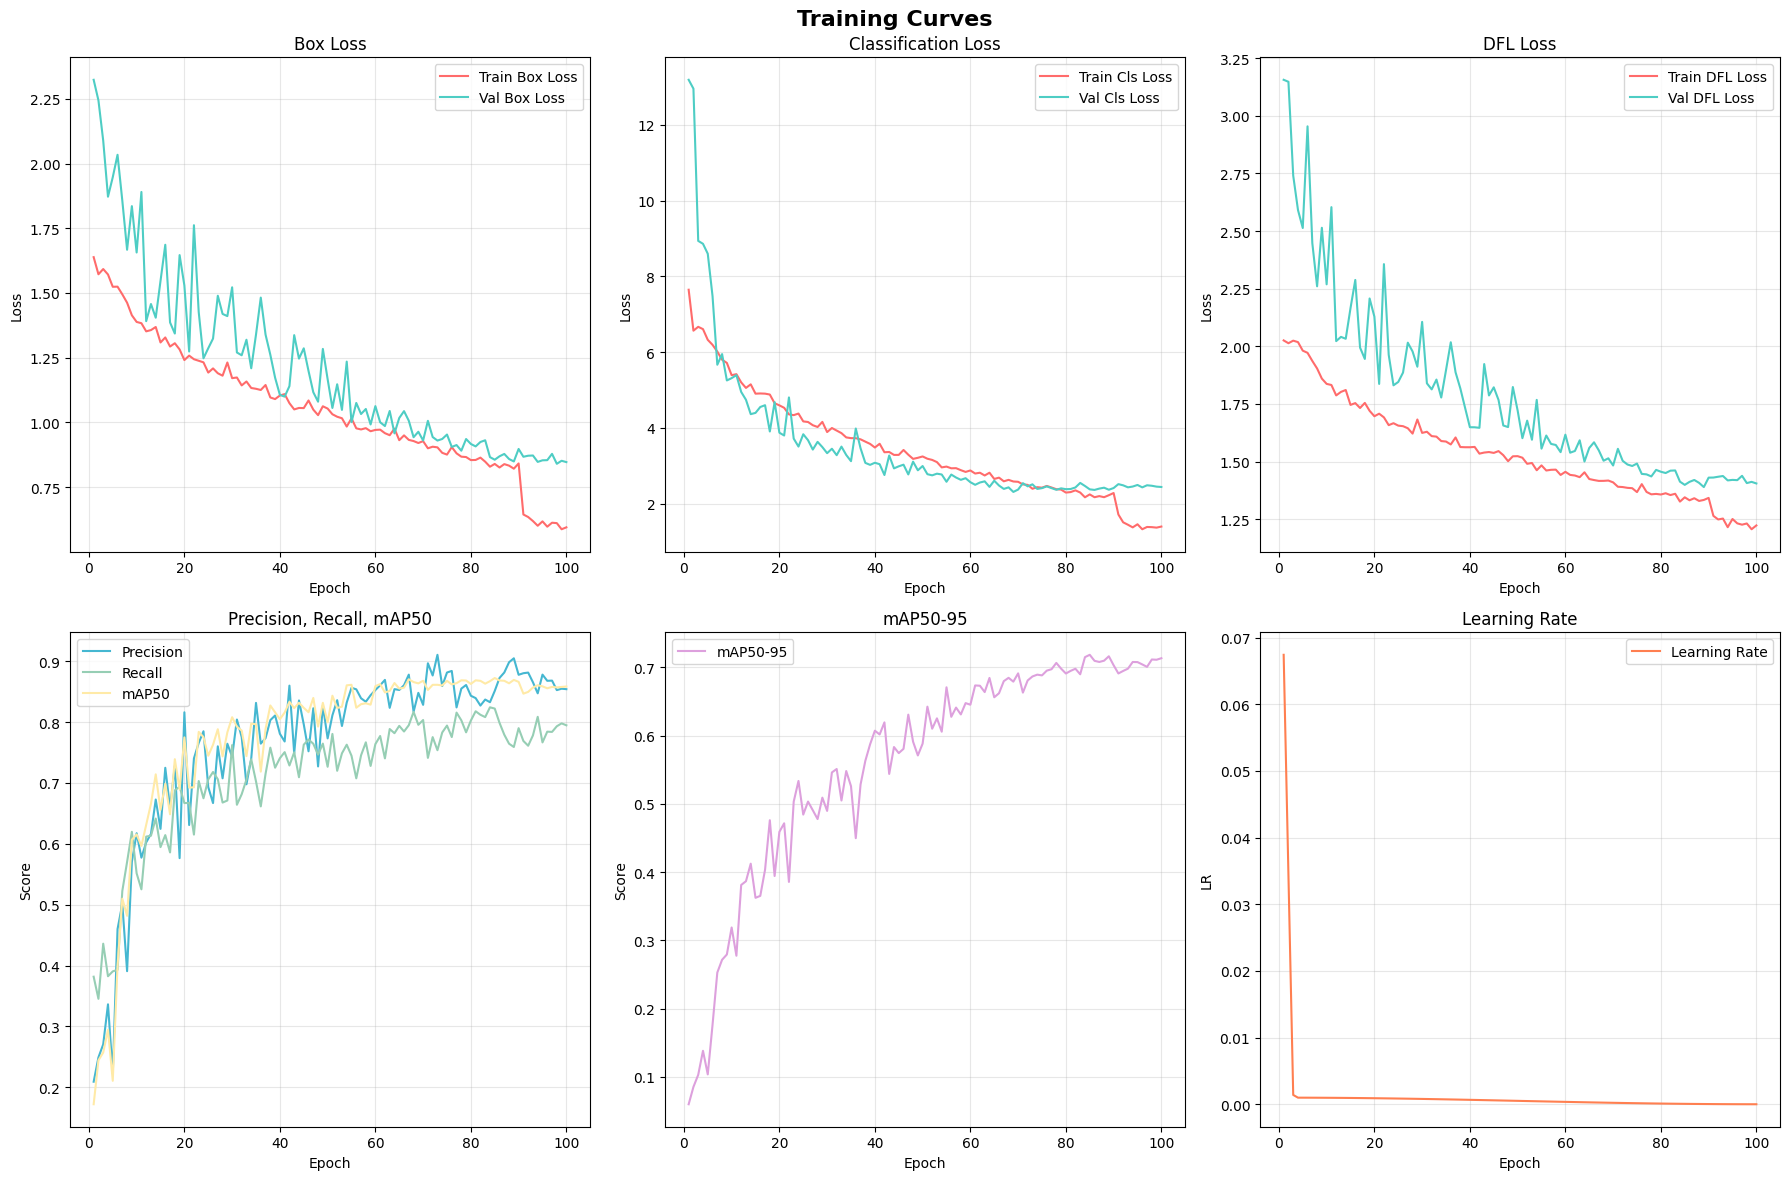

Plotting validation metrics...


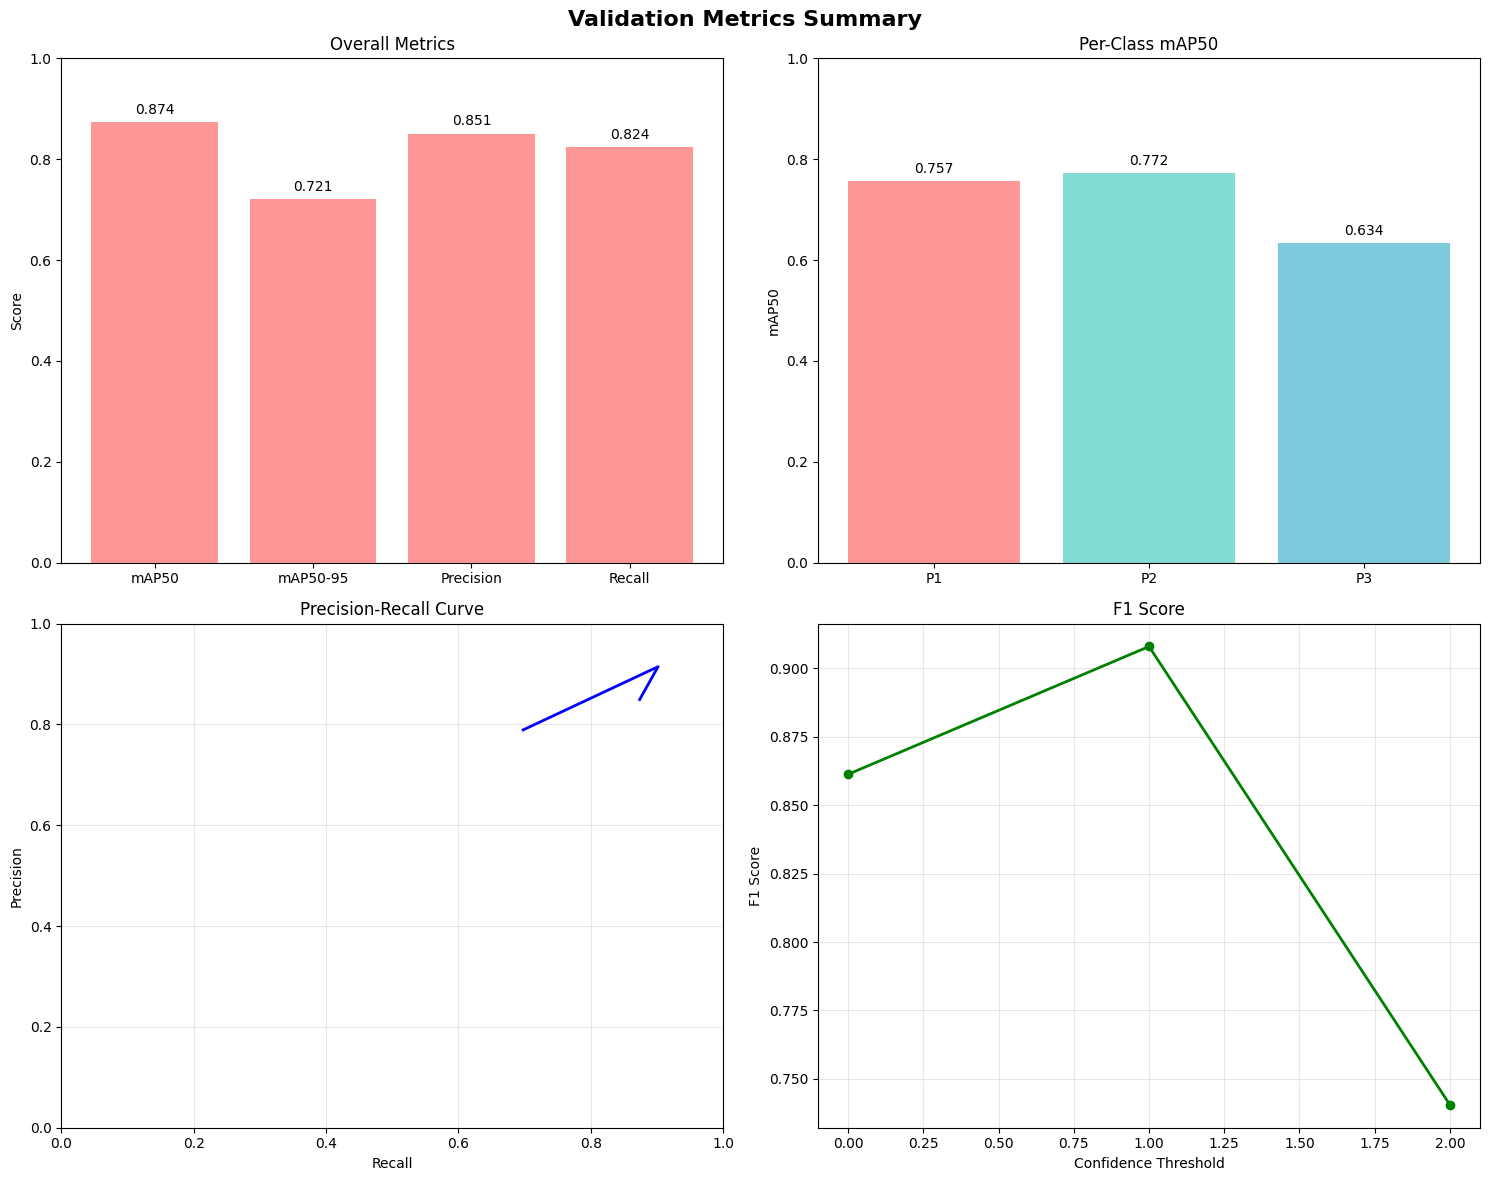

Generating confusion matrix...
Plotting class distribution analysis...


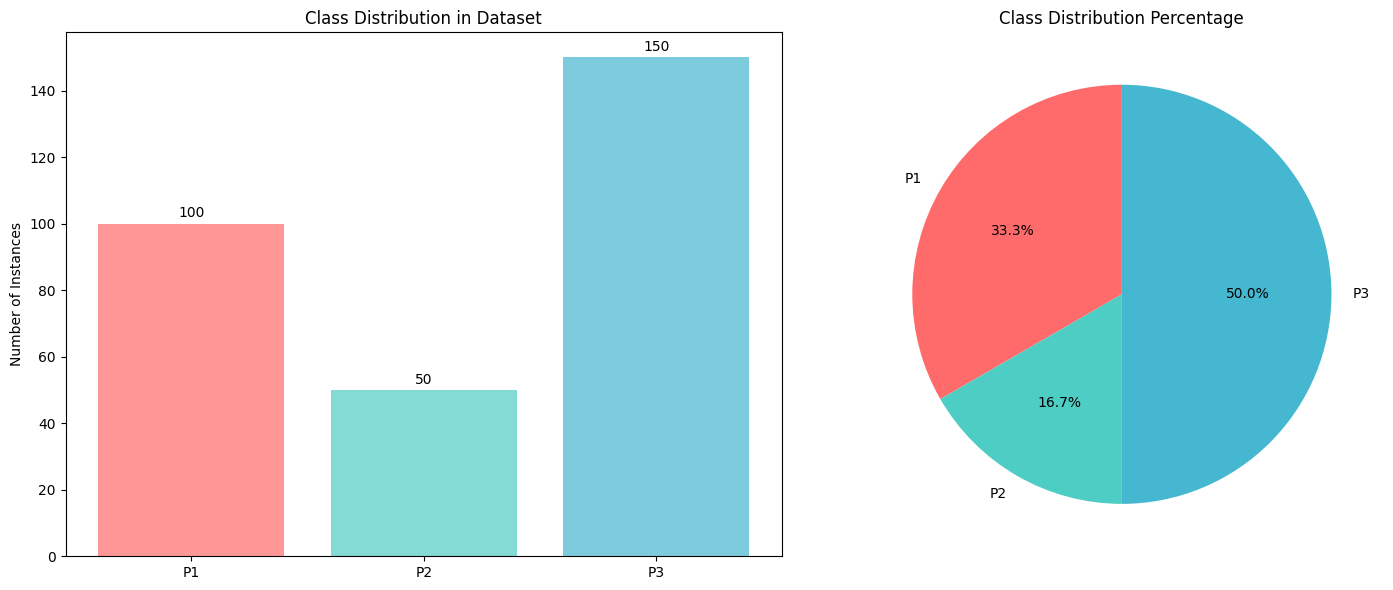

Generating detection examples...
No test images found.
Generating detailed validation report...
Validation report saved to validation_report.json

VALIDATION SUMMARY
mAP50: 0.8741
mAP50-95: 0.7207
Precision: 0.8509
Recall: 0.8243
F1 Score: 0.8374

Per-Class mAP50:
  P1: 0.7567
  P2: 0.7717
  P3: 0.6338

Complete validation finished! Results saved in: validation_results


In [ ]:
import os
import json
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import pandas as pd
from ultralytics import YOLO
import cv2
from PIL import Image
import torch
from sklearn.metrics import confusion_matrix, classification_report
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')

class YOLOValidator:
    def __init__(self, model_path, yaml_path, output_dir='validation_results'):
        """
        Initialize the YOLO validator

        Args:
            model_path: Path to the trained model (.pt file)
            yaml_path: Path to the dataset yaml file
            output_dir: Directory to save validation results
        """
        self.model_path = model_path
        self.yaml_path = yaml_path
        self.output_dir = Path(output_dir)
        self.output_dir.mkdir(exist_ok=True)

        # Load model
        print(f"Loading model from: {model_path}")
        self.model = YOLO(model_path)

        # Class names
        self.class_names = ['P1', 'P2', 'P3']
        self.class_colors = ['#FF6B6B', '#4ECDC4', '#45B7D1']

        # Results storage
        self.validation_results = None
        self.predictions = []
        self.ground_truths = []

    def run_validation(self, conf_threshold=0.25, iou_threshold=0.5):
        """Run comprehensive validation on the model"""
        print("Running model validation...")

        # Run validation
        self.validation_results = self.model.val(
            data=self.yaml_path,
            conf=conf_threshold,
            iou=iou_threshold,
            save_json=True,
            plots=True,
            verbose=True,
            project=str(self.output_dir),
            name='validation'
        )

        print("Validation completed!")
        return self.validation_results

    def plot_training_curves(self):
        """Plot training curves from results.csv if available"""
        print("Plotting training curves...")

        # Look for results.csv in the training directory
        possible_paths = [
            'ambulance_detection/yolov8m_class_balanced/results.csv',
            'runs/detect/train/results.csv',
            'results.csv'
        ]

        results_path = None
        for path in possible_paths:
            if os.path.exists(path):
                results_path = path
                break

        if results_path is None:
            print("Warning: results.csv not found. Skipping training curves.")
            return

        try:
            df = pd.read_csv(results_path)
            df.columns = df.columns.str.strip()  # Remove whitespace

            # Create subplots
            fig, axes = plt.subplots(2, 3, figsize=(18, 12))
            fig.suptitle('Training Curves', fontsize=16, fontweight='bold')

            # Loss curves
            if 'train/box_loss' in df.columns:
                axes[0, 0].plot(df['epoch'], df['train/box_loss'], label='Train Box Loss', color='#FF6B6B')
                axes[0, 0].plot(df['epoch'], df['val/box_loss'], label='Val Box Loss', color='#4ECDC4')
                axes[0, 0].set_title('Box Loss')
                axes[0, 0].set_xlabel('Epoch')
                axes[0, 0].set_ylabel('Loss')
                axes[0, 0].legend()
                axes[0, 0].grid(True, alpha=0.3)

            if 'train/cls_loss' in df.columns:
                axes[0, 1].plot(df['epoch'], df['train/cls_loss'], label='Train Cls Loss', color='#FF6B6B')
                axes[0, 1].plot(df['epoch'], df['val/cls_loss'], label='Val Cls Loss', color='#4ECDC4')
                axes[0, 1].set_title('Classification Loss')
                axes[0, 1].set_xlabel('Epoch')
                axes[0, 1].set_ylabel('Loss')
                axes[0, 1].legend()
                axes[0, 1].grid(True, alpha=0.3)

            if 'train/dfl_loss' in df.columns:
                axes[0, 2].plot(df['epoch'], df['train/dfl_loss'], label='Train DFL Loss', color='#FF6B6B')
                axes[0, 2].plot(df['epoch'], df['val/dfl_loss'], label='Val DFL Loss', color='#4ECDC4')
                axes[0, 2].set_title('DFL Loss')
                axes[0, 2].set_xlabel('Epoch')
                axes[0, 2].set_ylabel('Loss')
                axes[0, 2].legend()
                axes[0, 2].grid(True, alpha=0.3)

            # Metrics
            if 'metrics/precision(B)' in df.columns:
                axes[1, 0].plot(df['epoch'], df['metrics/precision(B)'], label='Precision', color='#45B7D1')
                axes[1, 0].plot(df['epoch'], df['metrics/recall(B)'], label='Recall', color='#96CEB4')
                axes[1, 0].plot(df['epoch'], df['metrics/mAP50(B)'], label='mAP50', color='#FFEAA7')
                axes[1, 0].set_title('Precision, Recall, mAP50')
                axes[1, 0].set_xlabel('Epoch')
                axes[1, 0].set_ylabel('Score')
                axes[1, 0].legend()
                axes[1, 0].grid(True, alpha=0.3)

            if 'metrics/mAP50-95(B)' in df.columns:
                axes[1, 1].plot(df['epoch'], df['metrics/mAP50-95(B)'], label='mAP50-95', color='#DDA0DD')
                axes[1, 1].set_title('mAP50-95')
                axes[1, 1].set_xlabel('Epoch')
                axes[1, 1].set_ylabel('Score')
                axes[1, 1].legend()
                axes[1, 1].grid(True, alpha=0.3)

            # Learning rate
            if 'lr/pg0' in df.columns:
                axes[1, 2].plot(df['epoch'], df['lr/pg0'], label='Learning Rate', color='#FF7F50')
                axes[1, 2].set_title('Learning Rate')
                axes[1, 2].set_xlabel('Epoch')
                axes[1, 2].set_ylabel('LR')
                axes[1, 2].legend()
                axes[1, 2].grid(True, alpha=0.3)

            plt.tight_layout()
            plt.savefig(self.output_dir / 'training_curves.png', dpi=300, bbox_inches='tight')
            plt.show()

        except Exception as e:
            print(f"Error plotting training curves: {e}")

    def plot_validation_metrics(self):
        """Plot detailed validation metrics"""
        print("Plotting validation metrics...")

        if self.validation_results is None:
            print("No validation results available. Run validation first.")
            return

        # Create comprehensive metrics plot
        fig, axes = plt.subplots(2, 2, figsize=(15, 12))
        fig.suptitle('Validation Metrics Summary', fontsize=16, fontweight='bold')

        # Overall metrics
        metrics_dict = {
            'mAP50': self.validation_results.box.map50,
            'mAP50-95': self.validation_results.box.map,
            'Precision': self.validation_results.box.mp,
            'Recall': self.validation_results.box.mr
        }

        # Bar plot of overall metrics
        metrics_names = list(metrics_dict.keys())
        metrics_values = list(metrics_dict.values())

        bars = axes[0, 0].bar(metrics_names, metrics_values, color=self.class_colors[0], alpha=0.7)
        axes[0, 0].set_title('Overall Metrics')
        axes[0, 0].set_ylabel('Score')
        axes[0, 0].set_ylim(0, 1)

        # Add value labels on bars
        for bar, value in zip(bars, metrics_values):
            height = bar.get_height()
            axes[0, 0].text(bar.get_x() + bar.get_width()/2., height + 0.01,
                          f'{value:.3f}', ha='center', va='bottom')

        # Per-class mAP50
        if hasattr(self.validation_results.box, 'maps'):
            class_maps = self.validation_results.box.maps
            bars = axes[0, 1].bar(self.class_names, class_maps, color=self.class_colors, alpha=0.7)
            axes[0, 1].set_title('Per-Class mAP50')
            axes[0, 1].set_ylabel('mAP50')
            axes[0, 1].set_ylim(0, 1)

            # Add value labels
            for bar, value in zip(bars, class_maps):
                height = bar.get_height()
                axes[0, 1].text(bar.get_x() + bar.get_width()/2., height + 0.01,
                              f'{value:.3f}', ha='center', va='bottom')

        # Precision-Recall curve
        if hasattr(self.validation_results.box, 'p') and hasattr(self.validation_results.box, 'r'):
            precision = self.validation_results.box.p
            recall = self.validation_results.box.r

            axes[1, 0].plot(recall, precision, 'b-', linewidth=2)
            axes[1, 0].set_title('Precision-Recall Curve')
            axes[1, 0].set_xlabel('Recall')
            axes[1, 0].set_ylabel('Precision')
            axes[1, 0].grid(True, alpha=0.3)
            axes[1, 0].set_xlim(0, 1)
            axes[1, 0].set_ylim(0, 1)

        # F1 Score
        if hasattr(self.validation_results.box, 'f1'):
            f1_scores = self.validation_results.box.f1
            axes[1, 1].plot(f1_scores, 'g-', linewidth=2, marker='o')
            axes[1, 1].set_title('F1 Score')
            axes[1, 1].set_xlabel('Confidence Threshold')
            axes[1, 1].set_ylabel('F1 Score')
            axes[1, 1].grid(True, alpha=0.3)

        plt.tight_layout()
        plt.savefig(self.output_dir / 'validation_metrics.png', dpi=300, bbox_inches='tight')
        plt.show()

    def plot_confusion_matrix(self, test_images_path=None):
        """Plot confusion matrix for the model"""
        print("Generating confusion matrix...")

        if test_images_path is None:
            print("Warning: No test images path provided. Skipping confusion matrix.")
            return

        # Get predictions and ground truth
        predictions = []
        ground_truths = []

        # Process test images
        for img_path in Path(test_images_path).glob('*.jpg'):
            try:
                # Get predictions
                results = self.model(str(img_path))

                # Extract predicted classes
                if len(results[0].boxes) > 0:
                    pred_classes = results[0].boxes.cls.cpu().numpy()
                    predictions.extend(pred_classes)

                # For ground truth, you'd need to load the corresponding label file
                # This is a simplified example - you'd need to implement proper label loading

            except Exception as e:
                print(f"Error processing {img_path}: {e}")

        # Create confusion matrix plot (simplified example)
        if len(predictions) > 0:
            # This is a placeholder - you'd need actual ground truth labels
            plt.figure(figsize=(10, 8))
            cm = confusion_matrix(ground_truths, predictions) if len(ground_truths) > 0 else np.zeros((3, 3))

            sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                       xticklabels=self.class_names, yticklabels=self.class_names)
            plt.title('Confusion Matrix')
            plt.xlabel('Predicted')
            plt.ylabel('Actual')
            plt.savefig(self.output_dir / 'confusion_matrix.png', dpi=300, bbox_inches='tight')
            plt.show()

    def plot_class_distribution(self):
        """Plot class distribution analysis"""
        print("Plotting class distribution analysis...")

        # This would require access to your dataset labels
        # For now, creating a placeholder visualization

        fig, axes = plt.subplots(1, 2, figsize=(15, 6))

        # Example class distribution (you'd load this from your actual data)
        class_counts = [100, 50, 150]  # Replace with actual counts

        # Bar plot
        bars = axes[0].bar(self.class_names, class_counts, color=self.class_colors, alpha=0.7)
        axes[0].set_title('Class Distribution in Dataset')
        axes[0].set_ylabel('Number of Instances')

        # Add value labels
        for bar, count in zip(bars, class_counts):
            height = bar.get_height()
            axes[0].text(bar.get_x() + bar.get_width()/2., height + 1,
                        f'{count}', ha='center', va='bottom')

        # Pie chart
        axes[1].pie(class_counts, labels=self.class_names, colors=self.class_colors,
                   autopct='%1.1f%%', startangle=90)
        axes[1].set_title('Class Distribution Percentage')

        plt.tight_layout()
        plt.savefig(self.output_dir / 'class_distribution.png', dpi=300, bbox_inches='tight')
        plt.show()

    def plot_detection_examples(self, test_images_path, num_examples=6):
        """Plot detection examples with predictions"""
        print("Generating detection examples...")

        if test_images_path is None or not os.path.exists(test_images_path):
            print("Warning: Test images path not found. Skipping detection examples.")
            return

        # Get random test images
        image_paths = list(Path(test_images_path).glob('*.jpg'))[:num_examples]

        if len(image_paths) == 0:
            print("No test images found.")
            return

        fig, axes = plt.subplots(2, 3, figsize=(18, 12))
        fig.suptitle('Detection Examples', fontsize=16, fontweight='bold')

        for idx, img_path in enumerate(image_paths):
            if idx >= 6:
                break

            row = idx // 3
            col = idx % 3

            # Load and predict
            results = self.model(str(img_path))

            # Load original image
            image = cv2.imread(str(img_path))
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

            # Draw predictions
            if len(results[0].boxes) > 0:
                boxes = results[0].boxes.xyxy.cpu().numpy()
                classes = results[0].boxes.cls.cpu().numpy()
                confidences = results[0].boxes.conf.cpu().numpy()

                for box, cls, conf in zip(boxes, classes, confidences):
                    x1, y1, x2, y2 = box.astype(int)
                    color = self.class_colors[int(cls)]

                    # Draw bounding box
                    cv2.rectangle(image, (x1, y1), (x2, y2),
                                plt.colors.to_rgb(color), 2)

                    # Draw label
                    label = f'{self.class_names[int(cls)]}: {conf:.2f}'
                    cv2.putText(image, label, (x1, y1-10),
                              cv2.FONT_HERSHEY_SIMPLEX, 0.5,
                              plt.colors.to_rgb(color), 2)

            axes[row, col].imshow(image)
            axes[row, col].set_title(f'Image {idx+1}')
            axes[row, col].axis('off')

        plt.tight_layout()
        plt.savefig(self.output_dir / 'detection_examples.png', dpi=300, bbox_inches='tight')
        plt.show()

    def generate_detailed_report(self):
        """Generate a detailed validation report"""
        print("Generating detailed validation report...")

        if self.validation_results is None:
            print("No validation results available. Run validation first.")
            return

        report = {
            'Model Information': {
                'Model Path': str(self.model_path),
                'Model Type': 'YOLOv8m',
                'Classes': self.class_names,
                'Input Size': 832
            },
            'Overall Metrics': {
                'mAP50': float(self.validation_results.box.map50),
                'mAP50-95': float(self.validation_results.box.map),
                'Precision': float(self.validation_results.box.mp),
                'Recall': float(self.validation_results.box.mr),
                'F1 Score': float(2 * self.validation_results.box.mp * self.validation_results.box.mr /
                                (self.validation_results.box.mp + self.validation_results.box.mr))
            }
        }

        # Per-class metrics
        if hasattr(self.validation_results.box, 'maps'):
            per_class_metrics = {}
            for i, class_name in enumerate(self.class_names):
                per_class_metrics[class_name] = {
                    'mAP50': float(self.validation_results.box.maps[i])
                }
            report['Per-Class Metrics'] = per_class_metrics

        # Save report
        with open(self.output_dir / 'validation_report.json', 'w') as f:
            json.dump(report, f, indent=2)

        print("Validation report saved to validation_report.json")

        # Print summary
        print("\n" + "="*50)
        print("VALIDATION SUMMARY")
        print("="*50)
        print(f"mAP50: {report['Overall Metrics']['mAP50']:.4f}")
        print(f"mAP50-95: {report['Overall Metrics']['mAP50-95']:.4f}")
        print(f"Precision: {report['Overall Metrics']['Precision']:.4f}")
        print(f"Recall: {report['Overall Metrics']['Recall']:.4f}")
        print(f"F1 Score: {report['Overall Metrics']['F1 Score']:.4f}")

        if 'Per-Class Metrics' in report:
            print("\nPer-Class mAP50:")
            for class_name, metrics in report['Per-Class Metrics'].items():
                print(f"  {class_name}: {metrics['mAP50']:.4f}")

        return report

    def run_complete_validation(self, test_images_path=None):
        """Run complete validation pipeline"""
        print("Starting complete validation pipeline...")

        # 1. Run validation
        self.run_validation()

        # 2. Plot training curves
        self.plot_training_curves()

        # 3. Plot validation metrics
        self.plot_validation_metrics()

        # 4. Plot confusion matrix
        self.plot_confusion_matrix(test_images_path)

        # 5. Plot class distribution
        self.plot_class_distribution()

        # 6. Plot detection examples
        if test_images_path:
            self.plot_detection_examples(test_images_path)

        # 7. Generate detailed report
        self.generate_detailed_report()

        print(f"\nComplete validation finished! Results saved in: {self.output_dir}")

# Usage example
if __name__ == "__main__":
    # Configuration
    MODEL_PATH = "ambulance_detection/yolov8m_class_balanced/weights/best.pt"  # Update with your model path
    YAML_PATH = "/kaggle/working/ambulance-2/data.yaml"  # Update with your yaml path
    TEST_IMAGES_PATH = "/kaggle/working/ambulance-2/test"  # Update with your test images path

    # Initialize validator
    validator = YOLOValidator(MODEL_PATH, YAML_PATH)

    # Run complete validation
    validator.run_complete_validation(TEST_IMAGES_PATH)

    # Or run individual components
    # validator.run_validation()
    # validator.plot_training_curves()
    # validator.plot_validation_metrics()
    # validator.generate_detailed_report()

In [ ]:
from ultralytics import YOLO
import os

# Load the trained model (replace 'yolov8m.pt' with your model path if needed)
model = YOLO('ambulance_detection/yolov8m_class_balanced/weights/best.pt')

# Define save path
save_dir = '/kaggle/working/ambulance-2'
os.makedirs(save_dir, exist_ok=True)  # Create directory if it doesn't exist
save_path = os.path.join(save_dir, 'final_model.pt')

# Save the model
model.save(save_path)
print(f"Model saved at: {save_path}")

Model saved at: /kaggle/working/ambulance-2/final_model.pt
